<a href="https://colab.research.google.com/github/TrixP/TrixP/blob/main/Copia_de_6_shapefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Necesitamos instalar la paquetería de ```geopandas```, ya que no esta preinstalada como las demás paqueterías que hemos usado.

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 6.5 MB/s 
     |████████████████████████████████| 15.4 MB 35.1 MB/s 
     |████████████████████████████████| 6.3 MB 36.3 MB/s 


Instalamos la paquetería ```wget``` , la cual contiene una función para poder descargar el contenido dentro del URL

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=bd7d854cbd9e508f81ff5c2ad95943f6becee4283b9a84ca2e57efce40fab54b
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


# Adquisición de datos

Descargamos de mi github un archivo zip con el contenido del archivo SHP

In [ ]:
import wget
from zipfile import ZipFile

#URLs Github 
SHP_ROOT = 'https://github.com/IvanMGro/CENACE/raw/main/'
SHP_FILE = 'MexicoSHP2.zip'

#Damos como argumento el url y descargamos los zipfiles
wget.download(SHP_ROOT+SHP_FILE)

#Creamos un objeto ZipFile mediante el modulo ZipFile el cual le damos
#como argumento nuestro archivo zip, 'r' es un parámetro para indicar 
#que abriremos el zip en modo de lectura (read mode) y harémos referencia
#a este archivo bajo el alias 'zip' ('as zip') 
with ZipFile(SHP_FILE, 'r') as zip:
    #Extraemos todo el contenido del zip con el metodo .extractall()
    print('Extrayendo archivos...')
    zip.extractall()
    print('Finalizado')

Extrayendo archivos...
Finalizado


In [ ]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

Creamos una carpeta llamada "shp" y albergamos en esta carpeta los 8 archivos del archivo ZIP

In [ ]:
os.chdir('MexicoSHP2')

Leemos nuestro archivo shp que contiene un dataframe con las geometrias a graficar

#Shapefile

Un geodataframe guarda información geográfica en una tabla, en donde cada fila representa una geometría, este caso, cada geometría de esta dataframe esta asociado a un estado de la república mexicana. cada geometría esta dada por una serie de puntos y lineas que finalmente delimitan la estructura de un polígono, esta información se encuentra en la columna ```geometry```

In [ ]:
fp = 'destdv250k_2gw.shp'
mexico = gpd.read_file(fp)
mexico

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry
0,6.710632,22.081488,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((-116.15195 32.61459, -116.13523 32.6..."
1,16.687178,36.642330,3,2,SONORA,Hermosillo,None,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4..."
2,0.000045,0.032972,4,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.29441 32.43412, -117.29514 32.4..."
3,0.000004,0.008558,5,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.26293 32.42339, -117.26320 32.4..."
4,0.000012,0.021596,6,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.25951 32.41480, -117.25991 32.4..."
...,...,...,...,...,...,...,...,...,...
1208,0.000498,0.098991,1210,1209,CHIAPAS,None,ISLA,07,"POLYGON ((-92.82037 15.16438, -92.82115 15.164..."
1209,0.000049,0.032163,1211,1210,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85334 15.16283, -92.85380 15.162..."
1210,0.000006,0.009840,1212,1211,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85617 15.17170, -92.85710 15.171..."
1211,0.000003,0.006575,1213,1212,CHIAPAS,None,ISLA,07,"POLYGON ((-92.77406 15.15408, -92.77421 15.154..."


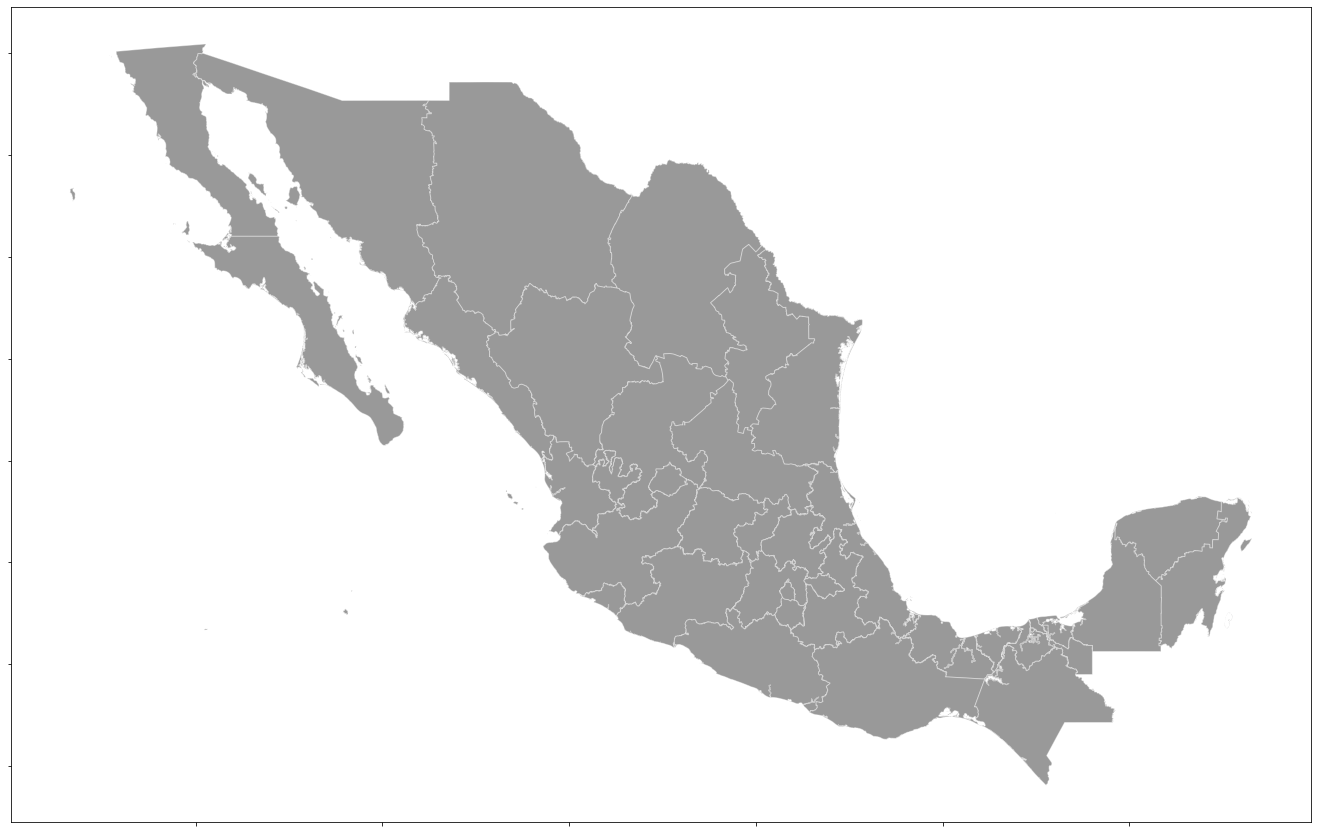

In [ ]:
#Declaramos la figura con un tamaño definido
fig, ax = plt.subplots(figsize=(25,15))

mexico.plot(ax=ax, alpha=0.4,edgecolor = 'white',color='black')

ax.tick_params(labelbottom=False,labelleft=False)

# Map Scatter Plot

Leemos los datos almacenados en nuestros archivos excel con información de los PML promedio por zona de carga y las coordenadas de cada zona de carga

In [ ]:
pml_df   = pd.read_excel('https://github.com/IvanMGro/CENACE/raw/main/pmlzona.xlsx')
coord_df = pd.read_excel('https://github.com/IvanMGro/CENACE/raw/main/coordenadas.xlsx')

In [ ]:
Fecha = '2020-02-11'

Escogemos una fecha para realizar este análisis

In [ ]:
pml_dia = pml_df.loc[(pml_df['Fecha'] == Fecha)][['Zona','PML']]
pml_dia

,Zona,PML
4141,ACAPULCO,1035.510833
4142,AGUASCALIENTES,692.822083
4143,APATZINGAN,763.601250
4144,CABORCA,185.391667
4145,CAMARGO,367.608333
...,...,...
4237,ZACAPU,734.039167
4238,ZACATECAS,689.118333
4239,ZAMORA,736.320833
4240,ZAPOTLAN,729.052917


Filtramos nuestros datos de acuerdo a la fecha establecida para realizar este análisis

In [ ]:
map_df = pd.merge(coord_df,pml_dia)
map_df

,Zona,Latitud,Longitud,PML
0,CENTRO ORIENTE,20.116541,-98.741354,609.893750
1,CENTRO SUR,19.292545,-99.656901,878.859583
2,LAZARO CARDENAS,18.082542,-102.482672,833.667500
3,VDM CENTRO,19.432299,-99.132391,1016.625417
4,VDM NORTE,19.478580,-99.232879,916.596667
...,...,...,...,...
96,CHETUMAL,18.514587,-88.300553,1582.461667
97,MERIDA,20.967076,-89.623740,1571.490417
98,MOTUL TIZIMIN,20.690251,-88.201700,1542.689583
99,RIVIERA MAYA,20.630864,-87.077950,1726.202917


Mediante la función ```pd.merge()``` podemos combinar nuestro dataframe ```coord```y el dataframe ```pml_dia```. Debemos tener toda esta información en un mismo dataframe

In [ ]:
import numpy as np 

conditions = [
    (map_df['PML'] <= 250),
    (map_df['PML'] >  250) & (map_df['PML'] <= 500),
    (map_df['PML'] >  500) & (map_df['PML'] <= 750),
    (map_df['PML'] >  750)
    ]

values = ['cyan', 'blue',  'orange', 'red']

De esta manera creo una nueva columna en mi dataframe anterior que asigna un color de acuerdo al valor del PML

In [ ]:
map_df['color'] = np.select(conditions,values)
map_df

,Zona,Latitud,Longitud,PML,color
0,CENTRO ORIENTE,20.116541,-98.741354,609.893750,orange
1,CENTRO SUR,19.292545,-99.656901,878.859583,red
2,LAZARO CARDENAS,18.082542,-102.482672,833.667500,red
3,VDM CENTRO,19.432299,-99.132391,1016.625417,red
4,VDM NORTE,19.478580,-99.232879,916.596667,red
...,...,...,...,...,...
96,CHETUMAL,18.514587,-88.300553,1582.461667,red
97,MERIDA,20.967076,-89.623740,1571.490417,red
98,MOTUL TIZIMIN,20.690251,-88.201700,1542.689583,red
99,RIVIERA MAYA,20.630864,-87.077950,1726.202917,red


Creamos finalmente nuestro mapa con los datos de PML para la fecha elegida

In [ ]:
fig, ax = plt.subplots(figsize=(25,15))

scatter = ax.scatter(map_df['Longitud'],map_df['Latitud'], s=map_df['PML']/4, color=map_df['color'])

mexico.plot(ax=ax, alpha=0.4, edgecolor='white',color='black')

ax.tick_params(labelbottom=False,labelleft=False)

ax.scatter([0], [0], c='cyan', alpha=1, s=250/4,
            label='<250', edgecolor='black')
ax.scatter([0], [0], c='blue', alpha=1, s=500/4,
            label='250-500', edgecolor='black')
ax.scatter([0], [0], c='orange', alpha=1, s=750/4,
            label='500-750', edgecolor='black')
ax.scatter([0], [0], c='red', alpha=1, s=1000/4,
            label='>750', edgecolor='black')

ax.set_xlim(-118,-86)
ax.set_ylim(14,33)

#Configuramos el cuadro de leyenda
ax.legend(scatterpoints=1,
        labelspacing=1, loc='lower left', fontsize=20, 
        bbox_to_anchor=(0.03,0.03), title_fontsize=20) 


#Titulo de la grafica
ax.set_title('SIN - PML ' + Fecha , fontsize=25, pad=10)

Exportamos una copia en png de este mapa

In [ ]:
fig.savefig('pml2020-02-11.png')

# Choropleth Map


Quiero conocer crear un gráfico donde cada estado tenga asignado un color e intensidad de acuerdo a la cantidad de subestaciones de 400 kV que hay en ese estado. Podemos acceder a los datos de los nodos directamente desde mi github

In [ ]:
nodos = pd.read_excel('https://github.com/IvanMGro/CENACE/raw/main/Nodos.xlsx')

Obtenemos un dataframe con la información requerida haciendo uso de ```.groupby()```

In [ ]:
nodos.rename(columns={'ENTIDAD FEDERATIVA (INEGI)':'ENTIDAD'},inplace=True)
nodos_volt = nodos[nodos['NIVEL DE TENSIÓN (kV)'] == 400]
nodos_plot = nodos_volt.groupby(['ENTIDAD'])['NIVEL DE TENSIÓN (kV)'].count().reset_index()
nodos_plot

,ENTIDAD,NIVEL DE TENSIÓN (kV)
0,AGUASCALIENTES,1
1,CHIAPAS,3
2,COAHUILA DE ZARAGOZA,5
3,COLIMA,1
4,HIDALGO,1
5,JALISCO,3
6,MEXICO,1
7,MICHOACAN DE OCAMPO,2
8,MORELOS,1
9,NAYARIT,2


Combinamos ambos dataframes. el argumento ```how='left'```implica que vamos a conservar las filas del dataframe izquierdo, es decir del geodataframe ```mexico```

In [ ]:
df_combined = pd.merge(mexico,nodos_plot,how='left')
df_combined

,AREA,PERIMETER,COV_,COV_ID,ENTIDAD,CAPITAL,RASGO_GEOG,NUM_EDO,geometry,NIVEL DE TENSIÓN (kV)
0,6.710632,22.081488,2,1,BAJA CALIFORNIA,Mexicali,None,02,"POLYGON ((-116.15195 32.61459, -116.13523 32.6...",NaN
1,16.687178,36.642330,3,2,SONORA,Hermosillo,None,26,"POLYGON ((-114.81361 32.49456, -114.81306 32.4...",1.0
2,0.000045,0.032972,4,3,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.29441 32.43412, -117.29514 32.4...",NaN
3,0.000004,0.008558,5,4,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.26293 32.42339, -117.26320 32.4...",NaN
4,0.000012,0.021596,6,5,BAJA CALIFORNIA,None,ISLA,02,"POLYGON ((-117.25951 32.41480, -117.25991 32.4...",NaN
...,...,...,...,...,...,...,...,...,...,...
1208,0.000498,0.098991,1210,1209,CHIAPAS,None,ISLA,07,"POLYGON ((-92.82037 15.16438, -92.82115 15.164...",3.0
1209,0.000049,0.032163,1211,1210,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85334 15.16283, -92.85380 15.162...",3.0
1210,0.000006,0.009840,1212,1211,CHIAPAS,None,ISLA,07,"POLYGON ((-92.85617 15.17170, -92.85710 15.171...",3.0
1211,0.000003,0.006575,1213,1212,CHIAPAS,None,ISLA,07,"POLYGON ((-92.77406 15.15408, -92.77421 15.154...",3.0


Finalmente podemos hacer uso de la función implicita .plot() disponible para los geodataframes. 

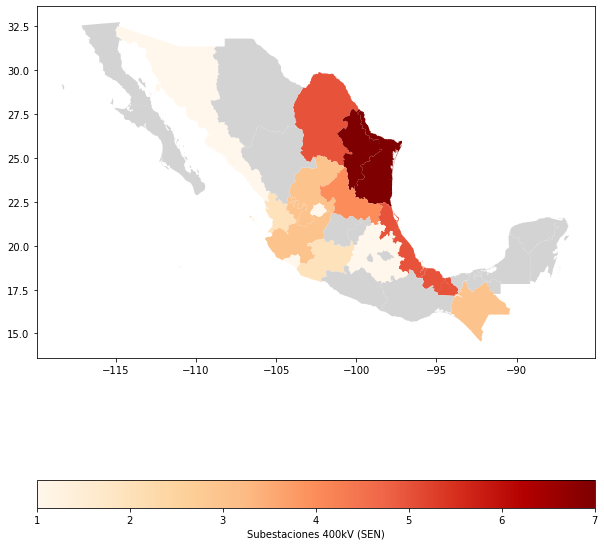

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))

df_combined.plot(
                column = 'NIVEL DE TENSIÓN (kV)', #la columna donde tenemos los datos a representar
                ax=ax, #grafica sobre ax
                cmap='OrRd',  #Color
                missing_kwds={'color':'lightgray'}, #Valores faltantes
                legend=True, #Mostrar cuadro de leyenda
                legend_kwds={'label':'Subestaciones 400kV (SEN)', #Cuadro de leyenda
                            'orientation':'horizontal'}
              )